In [1]:
# numpy for calculation and matplotlib for displaying plot 
import matplotlib.pyplot as plt
import numpy as np

# Reproducibility means that if you run the exact same simulation again, you get the exact same results
# why it is important??
## For bebbuging and finding mistakes 

In [2]:
# define parameters 
half_life = 109.771    # F-18 half-life in minutes
A0_Bq = 100e6              # initial activity in Bq (100 MBq)
duration_hours = 8         # simulate 8 hours
dt_seconds = 10            # step size for Monte Carlo
rng_seed = 420              # for reproducibility

In [3]:
# convert units and constants 
half_life_s = half_life * 60.0
lam = np.log(2) / half_life_s       # decay constant (1/s)
total_seconds = duration_hours * 3600

In [4]:
# initial number of Atoms
N0 = A0_Bq / lam

# 0: Start at 0 seconds.

# total_seconds + 1: Stop just after the total time (to ensure the final time is included).

# 60: Step size. Take a measurement every 60 seconds
# np.arange is a NumPy function that creates a sequence of numbers with a fixed step size between them

In [5]:
# Analytic solution
times_s = np.arange(0, total_seconds + 1, 60)   # 1 min steps
N_t = N0 * np.exp(-lam * times_s)
A_t = lam * N_t


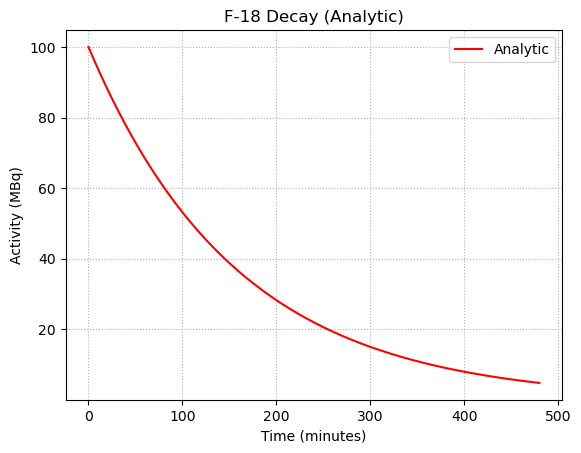

In [6]:
# plot analytic results
plt.figure()    
# "Get me a blank piece of graph paper."
# This creates a new, empty figure (plot) to draw on

plt.plot(times_s/60.0, A_t/1e6, label="Analytic", color="red")
# "Draw the line on my graph."

# times_s/60.0: Takes the time array (in seconds) and converts it to minutes to make the x-axis easier to read.

# A_t/1e6: Takes the activity data (probably in Becquerels, Bq) and converts it to MegaBecquerels (MBq) (1e6 Bq = 1 MBq) to make the y-axis numbers nicer.

# label="Analytic": Gives this line a name ("Analytic") so it can be shown in a legend

plt.xlabel("Time (minutes)")
# "Label the horizontal axis 'Time (minutes)'."

plt.ylabel("Activity (MBq)")
# "Label the vertical axis 'Activity (MBq)'.

plt.title("F-18 Decay (Analytic)")
# "Put a title at the top of the graph: 'F-18 Decay (Analytic)'."

plt.grid(True, linestyle=":", alpha=1.0)      # keep alpha less or equal 1, but not negative value 
# "Add grid lines to the graph to make it easier to read."

# linestyle="--": Makes the grid lines dashed.

# alpha=0.4: Makes the grid lines slightly transparent so they aren't too distracting.

plt.legend()
# "Show a little box that explains what the line on the graph represents." (It uses the label "Analytic" from the plt.plot command).
plt.show()
# "Okay, I'm done drawing. Display the final plot on the screen.


In [7]:
# Decay Probability per step
p = 1.0 - np.exp(-lam * dt_seconds)

In [8]:
# Monte Carlo simulator
np.random.seed(rng_seed)
num_steps = int(np.ceil(total_seconds / dt_seconds))
t_mc = np.arange(0, num_steps + 1) * dt_seconds

# Handles big numbers ✅ - Doesn't crash with large values

# More reliable ✅ - Better random number quality

# Your personal machine ✅ - You control the randomness

In [9]:

# Create a random number generator with the modern API
rng = np.random.default_rng()

In [10]:
# Simulation Loop
N_mc = np.empty(num_steps + 1, dtype=np.int64)
N_mc[0] = int(N0)

for i in range(1, num_steps + 1):
    decays = rng.binomial(N_mc[i-1], p)  # Use the modern Generator API
    N_mc[i] = N_mc[i-1] - decays

In [11]:
# compute activity 
A_mc = lam * N_mc

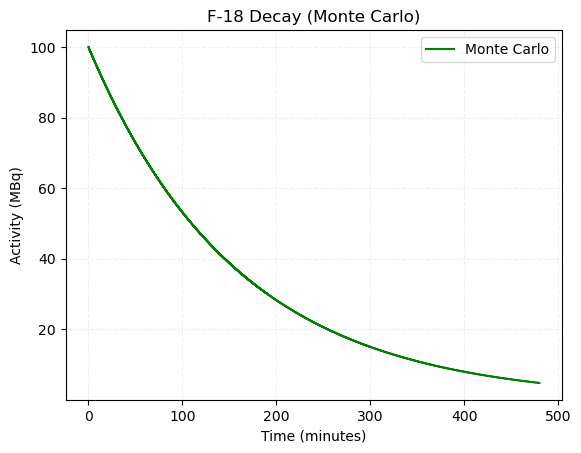

In [12]:
# Plot Monte Carlo Result
plt.figure()
plt.step(t_mc/60.0, A_mc/1e6,label="Monte Carlo", color="green")
plt.xlabel("Time (minutes)")
plt.ylabel("Activity (MBq)")
plt.title("F-18 Decay (Monte Carlo)")
plt.grid(True, linestyle="--", alpha=0.2)
plt.legend()
plt.show()
